In [2]:
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt

In [3]:
def readcdf(name):
    return az.from_netcdf(name)

In [4]:
allfour = readcdf("data/merged_22675897.cdf")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa168af9d10>,
      dtype=object)

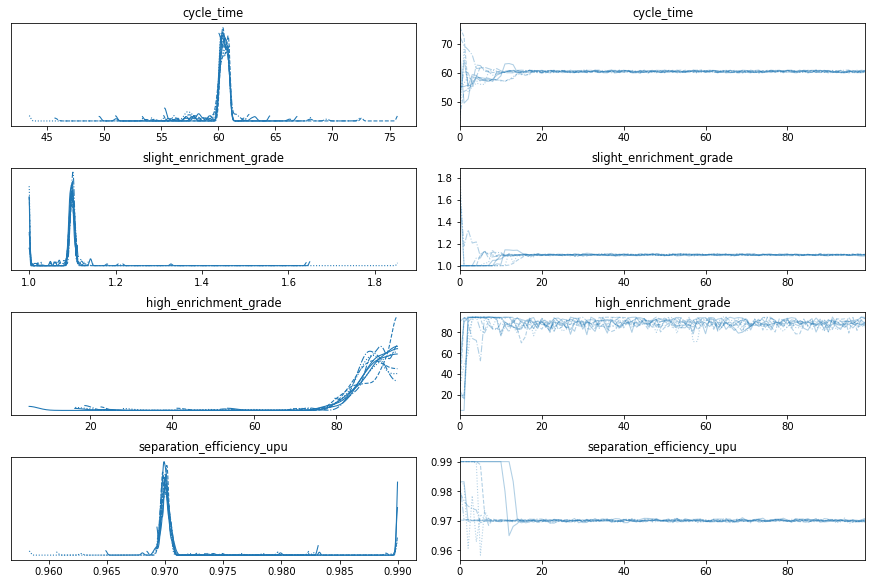

In [9]:
az.plot_trace(allfour)

In [51]:
rvsUni = {
    "cycle_time": [20, 120],
    "slight_enrichment_grade": [1.0, 2.0],
    "high_enrichment_grade": [5, 95],
    "separation_efficiency_upu": [0.85, 0.99]
}

rvsNormal = {
    "cycle_time": {"type": "Normal", "mu": 50, "sigma": 10},
    "high_enrichment_grade": {"type": "TruncatedNormal", "mu": 85, "sigma": 10, "lower": 50, "upper": 94.9},
    "slight_enrichment_grade": {"type": "TruncatedNormal", "mu": 1.3, "sigma": 0.3, "lower": 0.8, "upper": 2.0}
}


with pm.Model() as unimodel:
    for (n, v) in rvs.items():
        pm.Uniform(n, lower=v[0], upper=v[1])

with pm.Model() as normmodel:
    ct = pm.Normal("cycle_time", mu=50, sigma=10)
    heg = pm.TruncatedNormal("high_enrichment_grade", mu=85, sigma=10, lower=10, upper=94.9)
    seg = pm.TruncatedNormal("slight_enrichment_grade", mu=1.3, sigma=0.3, lower=0.8, upper=2.0)

In [54]:
samples = pm.sample_posterior_predictive(allfour, samples=5000, model=unimodel, var_names=rvsUni.keys())

In [55]:
normsamples = pm.sample_prior_predictive(samples=5000, model=normmodel)

In [44]:
priorsamples = pm.sample_prior_predictive(5000, model)

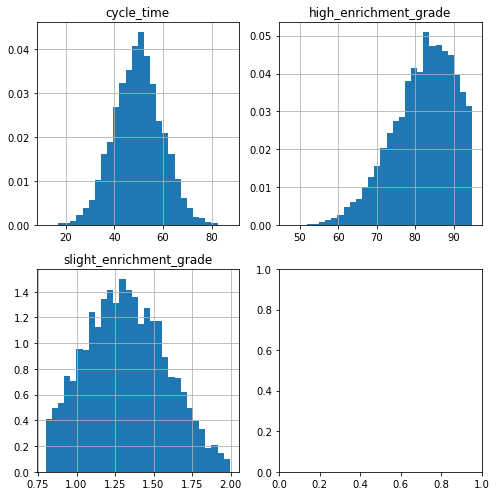

In [63]:
fig, axs = plt.subplots(2,2, figsize=(7,7), tight_layout=1.2)
for i, k in enumerate(rvsNormal.keys()):
    ax = axs[i//2, i%2]
    ax.grid()
    ax.hist(normsamples[k], label=k, bins=30, density=True)
    ax.set_title(k)
fig.savefig("out/normmodel_prior.png")

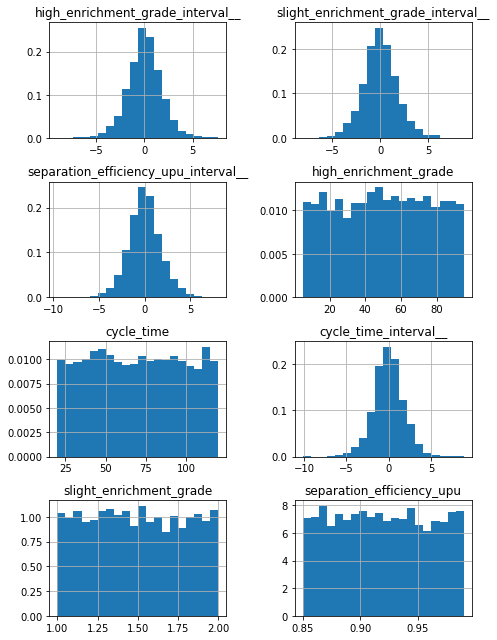

In [50]:
fig, axs = plt.subplots(4,2, figsize=(7,9), tight_layout=1.2)
for i, (v, s) in enumerate(priorsamples.items()):
    ax = axs[i//2, i%2]
    ax.grid()
    ax.hist(s, label=v, bins=20, density=True)
    ax.set_title(v)